In [1]:
import pandas as pd

# Adjust the path to where you saved your downloaded CSV file
# Example filename might be '/content/crypto_sentiment_prediction_dataset.csv' or similar
try:
    df_crypto = pd.read_csv('/content/crypto_sentiment_prediction_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Cryptocurrency dataset CSV not found. Please check the path and filename.")
    exit()

print("\n--- Initial Data Overview ---")
print(df_crypto.head())
print("\n--- DataFrame Info ---")
df_crypto.info()
print("\n--- Descriptive Statistics ---")
print(df_crypto.describe())

Dataset loaded successfully.

--- Initial Data Overview ---
             timestamp cryptocurrency  current_price_usd  \
0  2025-06-04 20:36:49       Algorand             0.3427   
1  2025-06-04 20:48:25         Cosmos            12.0420   
2  2025-06-04 21:28:54         Cosmos            11.7675   
3  2025-06-04 21:57:48       Ethereum          2861.2829   
4  2025-06-04 22:06:40         Solana            95.3583   

   price_change_24h_percent  trading_volume_24h  market_cap_usd  \
0                     -5.35          1716266.10    1.762124e+09   
1                      5.14         10520739.91    2.099178e+11   
2                     -6.12           642191.11    1.755367e+11   
3                    -11.54          5356227.76    4.786419e+13   
4                      5.79           735971.56    2.667611e+11   

   social_sentiment_score  news_sentiment_score  news_impact_score  \
0                   0.367                 0.374               1.87   
1                  -0.278           

**Data Cleaning & Preprocessing for the Cryptocurrency Market Sentiment & Price Forecasting**

**2.Data Cleaning & Preprocessing 🧹**


Most frequent cryptocurrency in the dataset: Ethereum (with 228 data points)
DataFrame filtered for Ethereum. New shape: (228, 14)

'cryptocurrency' column dropped as it's no longer needed for time series operations.

'timestamp' column converted to datetime and set as index.
DataFrame sorted by timestamp.
                     current_price_usd  price_change_24h_percent  \
timestamp                                                          
2025-06-04 21:57:48          2861.2829                    -11.54   
2025-06-05 07:05:22          3113.0269                     -4.51   
2025-06-05 17:22:51          3231.1742                     -5.88   
2025-06-05 23:08:35          3198.8640                      9.74   
2025-06-06 00:35:54          3154.4261                      5.56   

                     trading_volume_24h  market_cap_usd  \
timestamp                                                 
2025-06-04 21:57:48          5356227.76    4.786419e+13   
2025-06-05 07:05:22          2024438.

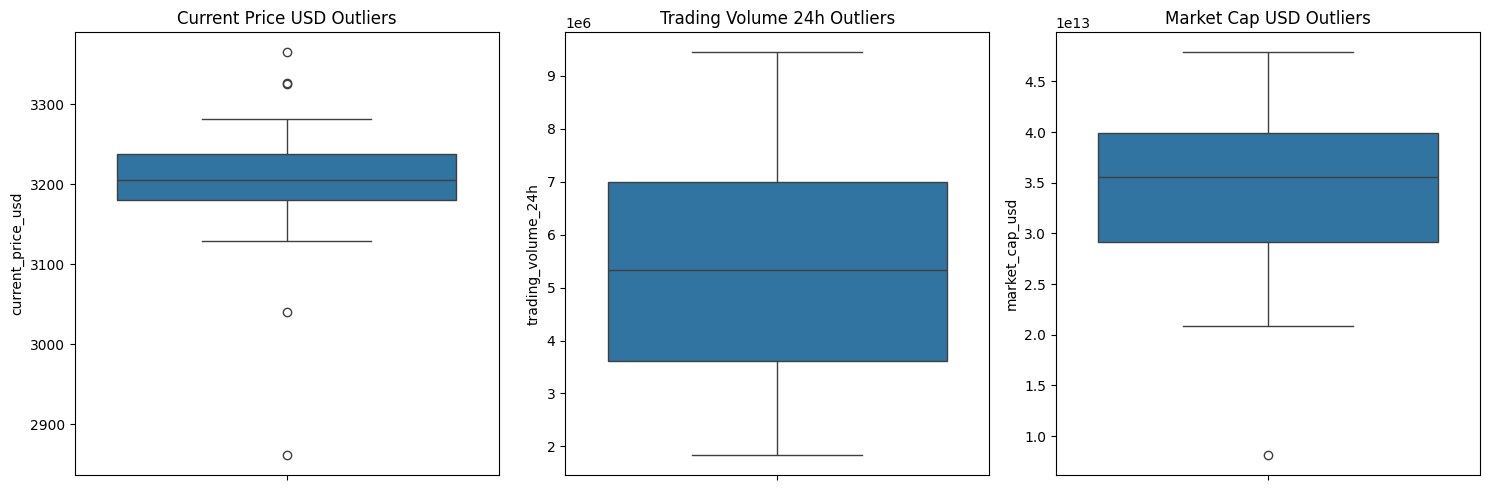


--- Data Cleaning and Preprocessing (Initial Pass) Complete ---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2.1: Select a Single Cryptocurrency ---
crypto_counts = df_crypto['cryptocurrency'].value_counts()
most_frequent_crypto = crypto_counts.index[0]
print(f"\nMost frequent cryptocurrency in the dataset: {most_frequent_crypto} (with {crypto_counts.iloc[0]} data points)")

df_single_crypto = df_crypto[df_crypto['cryptocurrency'] == most_frequent_crypto].copy()
print(f"DataFrame filtered for {most_frequent_crypto}. New shape: {df_single_crypto.shape}")

# --- Step 2.2: Convert 'timestamp' to datetime and set as index ---
df_single_crypto['timestamp'] = pd.to_datetime(df_single_crypto['timestamp'])
df_single_crypto.set_index('timestamp', inplace=True)
df_single_crypto.sort_index(inplace=True)

# --- FIX: Drop the 'cryptocurrency' column BEFORE resampling ---
# We've already filtered for a single crypto, so this column is no longer needed
# and would cause issues with numerical operations like .mean()
df_single_crypto.drop('cryptocurrency', axis=1, inplace=True)
print("\n'cryptocurrency' column dropped as it's no longer needed for time series operations.")


print("\n'timestamp' column converted to datetime and set as index.")
print("DataFrame sorted by timestamp.")
print(df_single_crypto.head()) # Check the new index (without 'cryptocurrency' column)


# --- Step 2.3: Check for Missing Dates/Time Gaps (Resampling) ---
# Resample to a daily frequency and take the mean of numerical columns for each day.
df_daily = df_single_crypto.resample('D').mean()
print(f"\nDataFrame resampled to daily frequency. New shape: {df_daily.shape}")

# Check for missing days after resampling (these will be NaNs)
missing_daily_count = df_daily.isnull().sum().max()
if missing_daily_count > 0:
    print(f"Warning: {missing_daily_count} missing days found after resampling to daily frequency.")
    # For time series, typically fill with previous value or interpolate
    df_daily.fillna(method='ffill', inplace=True) # Forward-fill missing values
    df_daily.fillna(method='bfill', inplace=True) # Backward-fill any remaining (e.g., at start)
    print("Missing values in resampled data filled using forward/backward fill.")
else:
    print("No missing days found after resampling to daily frequency.")


# --- Step 2.4: Handle Outliers (Preliminary Check) ---
print("\n--- Descriptive Statistics for Daily Data ---")
print(df_daily.describe())

# Visual check for outliers in key numerical columns for the selected crypto
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_daily['current_price_usd'])
plt.title('Current Price USD Outliers')
plt.subplot(1, 3, 2)
sns.boxplot(y=df_daily['trading_volume_24h'])
plt.title('Trading Volume 24h Outliers')
plt.subplot(1, 3, 3)
sns.boxplot(y=df_daily['market_cap_usd'])
plt.title('Market Cap USD Outliers')
plt.tight_layout()
plt.show()

print("\n--- Data Cleaning and Preprocessing (Initial Pass) Complete ---")

**3.Exploratory Data Analysis (EDA) for Cryptocurrency Forecasting 🔍**


--- Starting Exploratory Data Analysis (EDA) for Ethereum ---


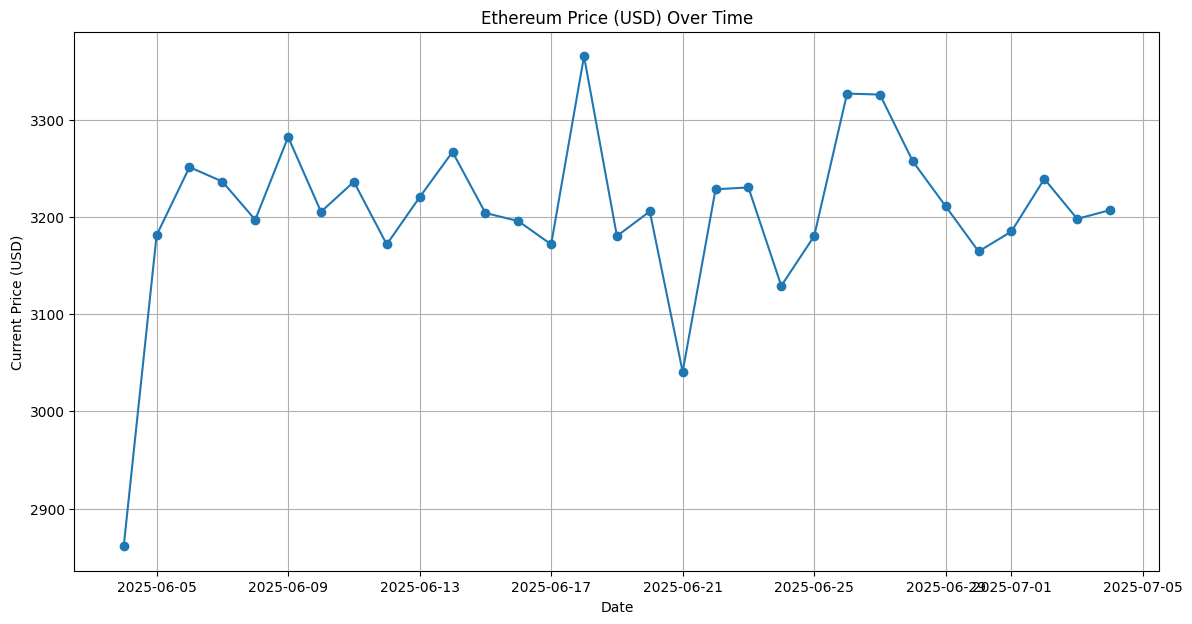

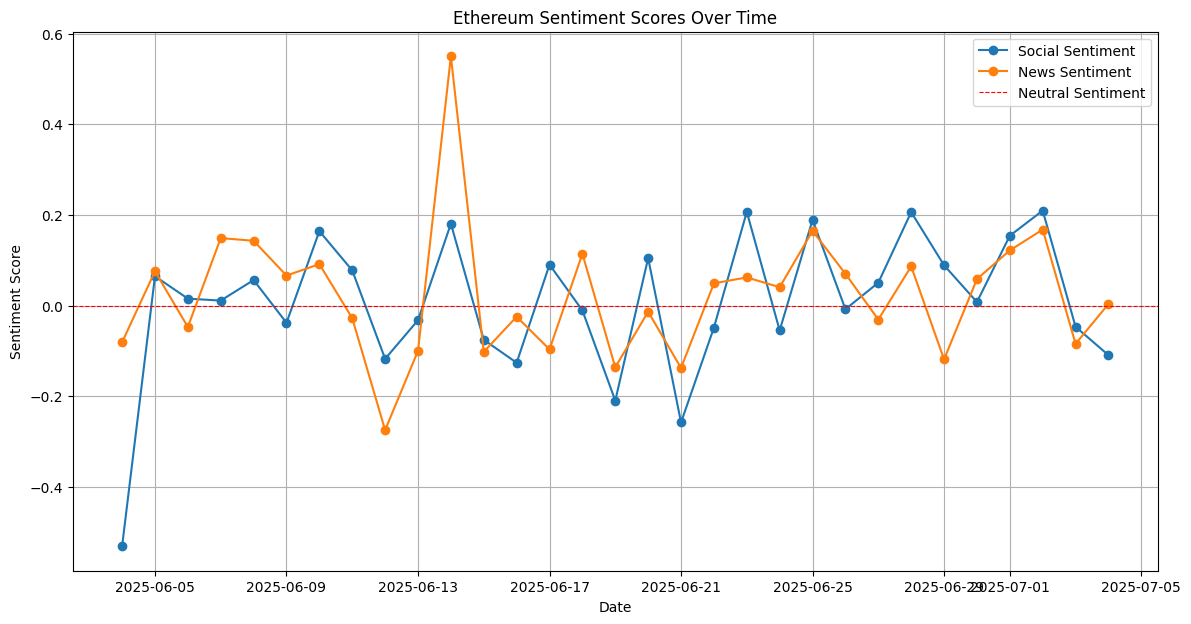

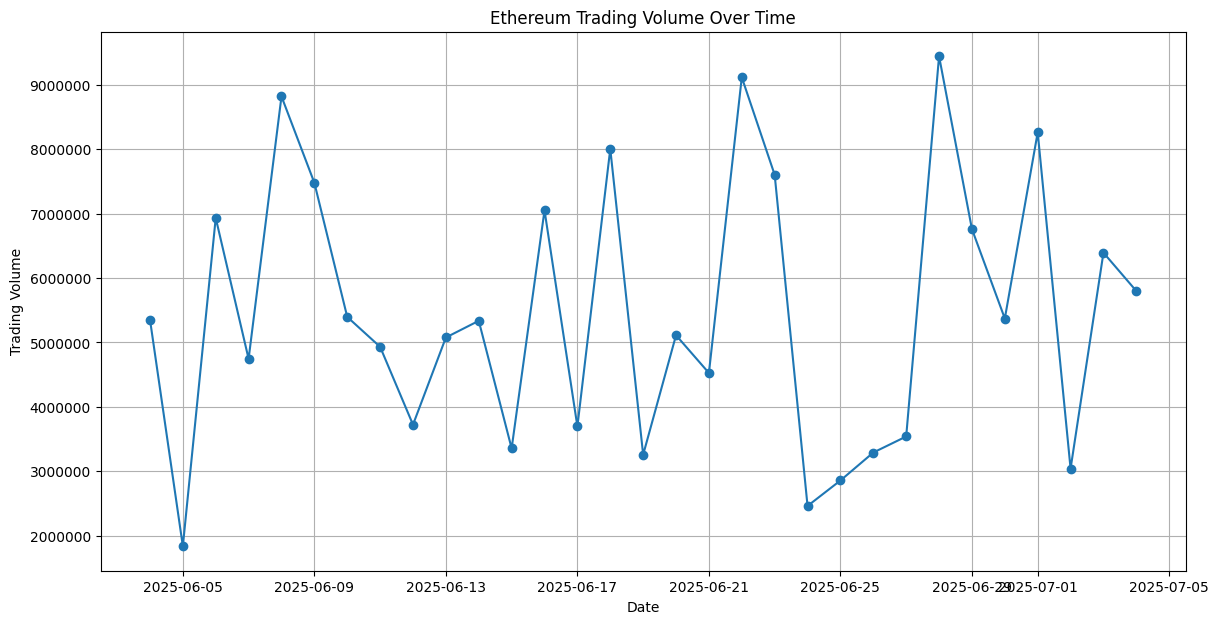

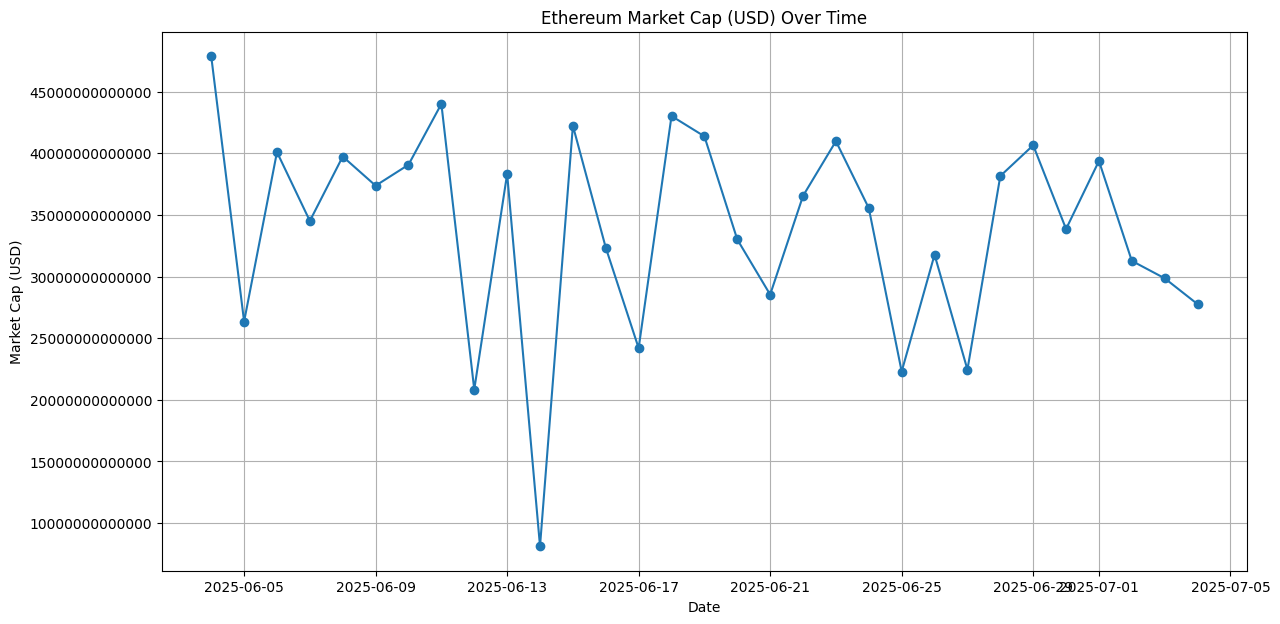

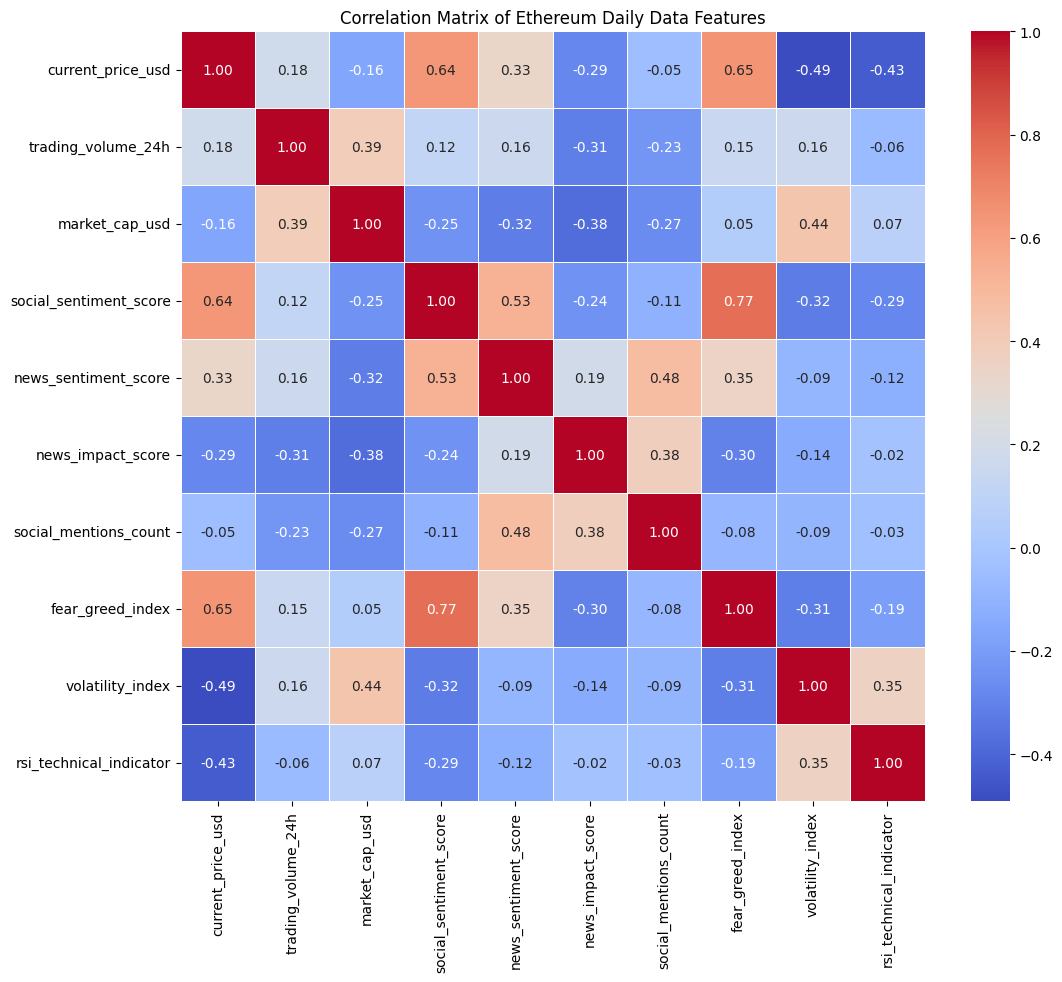

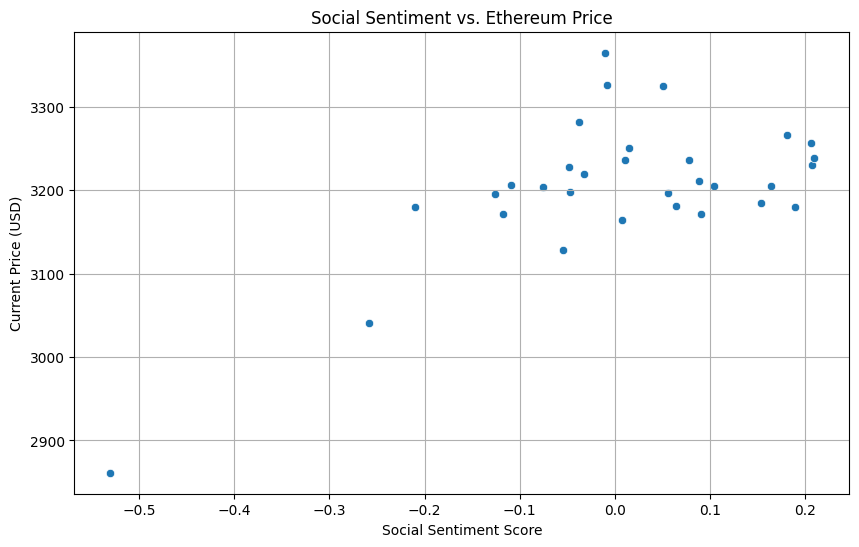


--- EDA Complete ---


In [4]:
# Assuming df_daily is available from the previous step

print("\n--- Starting Exploratory Data Analysis (EDA) for Ethereum ---")

# 1. Price Trend Over Time
plt.figure(figsize=(14, 7))
plt.plot(df_daily.index, df_daily['current_price_usd'], marker='o', linestyle='-')
plt.title('Ethereum Price (USD) Over Time')
plt.xlabel('Date')
plt.ylabel('Current Price (USD)')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#
# 2. Sentiment Scores Over Time
plt.figure(figsize=(14, 7))
plt.plot(df_daily.index, df_daily['social_sentiment_score'], label='Social Sentiment', marker='o', linestyle='-')
plt.plot(df_daily.index, df_daily['news_sentiment_score'], label='News Sentiment', marker='o', linestyle='-')
plt.title('Ethereum Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Neutral Sentiment') # Neutral line
plt.legend()
plt.grid(True)
plt.show()
#
# 3. Trading Volume and Market Cap Over Time
plt.figure(figsize=(14, 7))
plt.plot(df_daily.index, df_daily['trading_volume_24h'], label='Trading Volume 24h', marker='o', linestyle='-')
plt.title('Ethereum Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df_daily.index, df_daily['market_cap_usd'], label='Market Cap USD', marker='o', linestyle='-')
plt.title('Ethereum Market Cap (USD) Over Time')
plt.xlabel('Date')
plt.ylabel('Market Cap (USD)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()
#
# 4. Correlation Matrix
# Select only numerical columns for correlation matrix
numerical_cols_for_corr = df_daily.select_dtypes(include=np.number).columns.tolist()
# Exclude 'prediction_confidence' if it's external or not a feature we'll forecast with directly
# and 'price_change_24h_percent' for direct forecasting target
if 'prediction_confidence' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('prediction_confidence')
if 'price_change_24h_percent' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('price_change_24h_percent') # We're predicting price, not change directly

correlation_matrix = df_daily[numerical_cols_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Ethereum Daily Data Features')
plt.show()
#
# 5. Relationship between Social Sentiment and Price (Example scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_daily['social_sentiment_score'], y=df_daily['current_price_usd'])
plt.title('Social Sentiment vs. Ethereum Price')
plt.xlabel('Social Sentiment Score')
plt.ylabel('Current Price (USD)')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#

print("\n--- EDA Complete ---")

**4.Feature Engineering & Model Selection 🧠**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

# --- IMPORTANT: Re-execute the full Step 2 code first to get df_daily, if you restarted your kernel ---
# Assuming 'path/to/your/crypto_data.csv' is correct
try:
    df_crypto = pd.read_csv('/content/crypto_sentiment_prediction_dataset.csv') # REMEMBER TO SET YOUR PATH!
    # --- Step 2.1 & 2.2: Select Crypto, Convert Timestamp, Set Index, Drop Crypto Col ---
    most_frequent_crypto = df_crypto['cryptocurrency'].value_counts().index[0]
    df_single_crypto = df_crypto[df_crypto['cryptocurrency'] == most_frequent_crypto].copy()
    df_single_crypto['timestamp'] = pd.to_datetime(df_single_crypto['timestamp'])
    df_single_crypto.set_index('timestamp', inplace=True)
    df_single_crypto.sort_index(inplace=True)
    df_single_crypto.drop('cryptocurrency', axis=1, inplace=True)

    # --- Step 2.3: Resample to Daily and Handle Missing Days ---
    df_daily = df_single_crypto.resample('D').mean()
    if df_daily.isnull().sum().max() > 0:
        df_daily.fillna(method='ffill', inplace=True)
        df_daily.fillna(method='bfill', inplace=True)
    print("DataFrame df_daily prepared from Step 2.")

except FileNotFoundError:
    print("Error: Cryptocurrency dataset CSV not found. Please check the path and filename.")
    exit()
except Exception as e:
    print(f"An error occurred during re-execution of Step 2: {e}")
    print("Please ensure the CSV path is correct and all dependencies are installed.")
    exit()


print("\n--- Starting Feature Engineering & Model Selection (Revised) ---")

# --- Step 4.1: Feature Engineering (Revised) ---

df_model = df_daily.copy()
TARGET = 'current_price_usd'

# Create FEWER lagged features (e.g., price from 1, 2 days ago only)
# REVISED LAGS
lags = [1, 2] # Only 1 and 2 days ago

for lag in lags:
    df_model[f'{TARGET}_lag_{lag}'] = df_model[TARGET].shift(lag)
    df_model[f'social_sentiment_score_lag_{lag}'] = df_model['social_sentiment_score'].shift(lag)
    df_model[f'news_sentiment_score_lag_{lag}'] = df_model['news_sentiment_score'].shift(lag)
    df_model[f'fear_greed_index_lag_{lag}'] = df_model['fear_greed_index'].shift(lag)

print(f"Created FEWER lagged features for {TARGET}, sentiment, fear_greed_index.")


# Create FEWER rolling window statistics (e.g., only 3-day rolling mean/std of price)
# REVISED WINDOWS
windows = [3] # Only 3-day window

for window in windows:
    df_model[f'{TARGET}_rolling_mean_{window}D'] = df_model[TARGET].rolling(window=f'{window}D').mean()
    df_model[f'{TARGET}_rolling_std_{window}D'] = df_model[TARGET].rolling(window=f'{window}D').std()
    df_model[f'trading_volume_24h_rolling_mean_{window}D'] = df_model['trading_volume_24h'].rolling(window=f'{window}D').mean()

print("Created FEWER rolling window features.")

# Drop rows with NaN values introduced by lagging/rolling (these are at the beginning of the series)
df_model.dropna(inplace=True)
print(f"Dropped rows with NaN values from feature engineering. New shape: {df_model.shape}")
print(f"First few rows after feature engineering:\n{df_model.head()}")


# --- Step 4.2: Define Target (y) and Features (X) ---
y = df_model[TARGET]
# Exclude original price, market_cap_usd (highly correlated/derived), and price_change_24h_percent
X = df_model.drop([TARGET, 'market_cap_usd', 'price_change_24h_percent'], axis=1)

print(f"\nTarget variable: {TARGET}")
print(f"Features (X) shape: {X.shape}")
print(f"Features (X) columns:\n{X.columns.tolist()}")


# --- Step 4.3: Train-Test Split for Time Series ---
# Split chronologically: 80% for training, 20% for testing
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"\nTime-based train-test split complete.")
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


# --- Step 4.4: Model Selection & Training (LightGBM) ---
print("\n--- Training LightGBM Regressor Model ---")

lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

print("LightGBM Regressor Model Trained.")

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)


# --- Model Evaluation ---
print("\n--- Model Evaluation ---")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

print("\n--- Feature Engineering & Model Selection (Revised) Complete ---")

DataFrame df_daily prepared from Step 2.

--- Starting Feature Engineering & Model Selection (Revised) ---
Created FEWER lagged features for current_price_usd, sentiment, fear_greed_index.
Created FEWER rolling window features.
Dropped rows with NaN values from feature engineering. New shape: (29, 23)
First few rows after feature engineering:
            current_price_usd  price_change_24h_percent  trading_volume_24h  \
timestamp                                                                     
2025-06-06        3251.130850                  2.569000        6.933148e+06   
2025-06-07        3236.228546                  0.870769        4.744865e+06   
2025-06-08        3196.921783                 -1.810000        8.820123e+06   
2025-06-09        3282.103758                  1.373333        7.478624e+06   
2025-06-10        3205.157320                 -2.017000        5.396442e+06   

            market_cap_usd  social_sentiment_score  news_sentiment_score  \
timestamp                

**5. Feature Importance & Insights (Cryptocurrency Project) 💡**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 19, number of used features: 0
[LightGBM] [Info] Start training from score 3218.174252
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

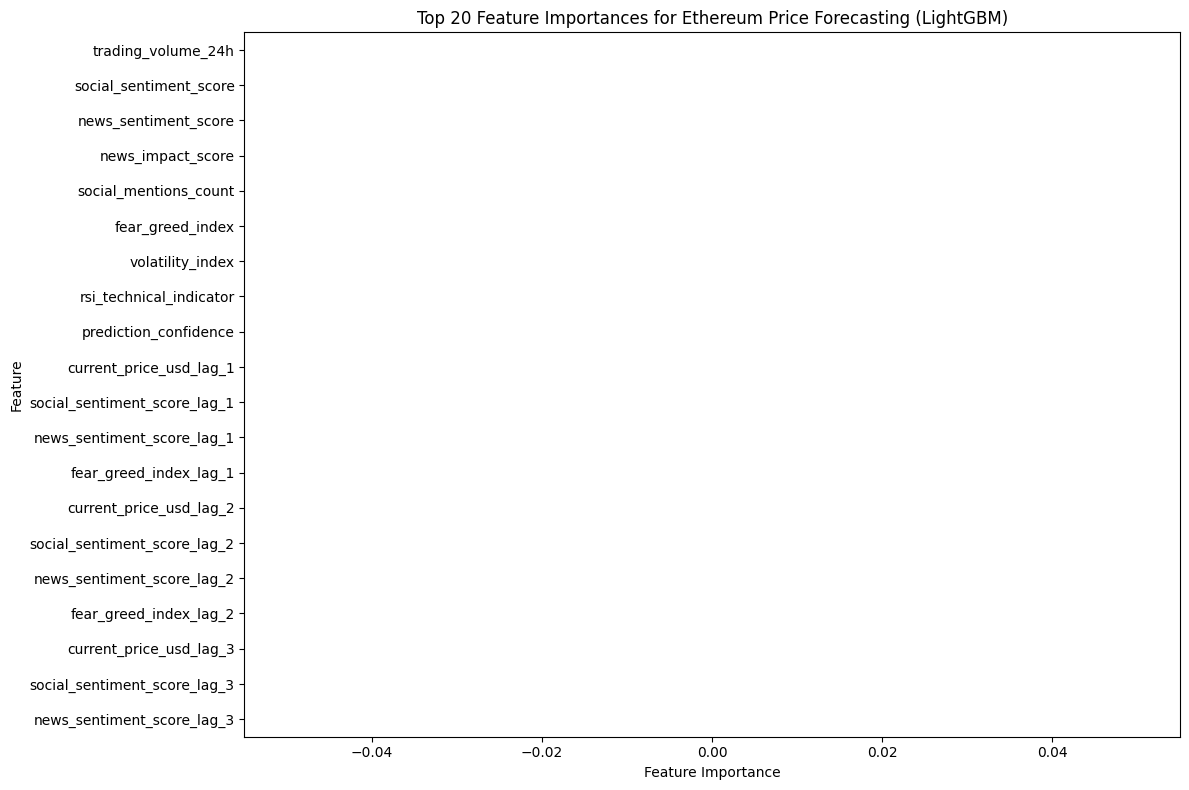


--- Feature Importance Analysis Complete ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- IMPORTANT: Ensure df_daily, X_train, y_train, X_test, y_test, and lgbm_model
#               are available from your previous successful run of Step 4 code.
#               If you restarted your kernel, please re-run the full Step 2 and Step 4 code blocks first.

# --- Re-load and re-process if running in a new session (otherwise, comment this block out) ---
# Assuming 'path/to/your/crypto_data.csv' is correct
try:
    df_crypto = pd.read_csv('/content/crypto_sentiment_prediction_dataset.csv') # REMEMBER TO SET YOUR PATH!
    # --- Step 2.1 & 2.2: Select Crypto, Convert Timestamp, Set Index, Drop Crypto Col ---
    most_frequent_crypto = df_crypto['cryptocurrency'].value_counts().index[0]
    df_single_crypto = df_crypto[df_crypto['cryptocurrency'] == most_frequent_crypto].copy()
    df_single_crypto['timestamp'] = pd.to_datetime(df_single_crypto['timestamp'])
    df_single_crypto.set_index('timestamp', inplace=True)
    df_single_crypto.sort_index(inplace=True)
    df_single_crypto.drop('cryptocurrency', axis=1, inplace=True)

    # --- Step 2.3: Resample to Daily and Handle Missing Days ---
    df_daily = df_single_crypto.resample('D').mean()
    if df_daily.isnull().sum().max() > 0:
        df_daily.fillna(method='ffill', inplace=True)
        df_daily.fillna(method='bfill', inplace=True)

    # --- Step 4.1: Feature Engineering ---
    df_model = df_daily.copy()
    TARGET = 'current_price_usd'
    lags = [1, 2, 3, 5, 7]
    for lag in lags:
        df_model[f'{TARGET}_lag_{lag}'] = df_model[TARGET].shift(lag)
        df_model[f'social_sentiment_score_lag_{lag}'] = df_model['social_sentiment_score'].shift(lag)
        df_model[f'news_sentiment_score_lag_{lag}'] = df_model['news_sentiment_score'].shift(lag)
        df_model[f'fear_greed_index_lag_{lag}'] = df_model['fear_greed_index'].shift(lag)
    windows = [3, 7]
    for window in windows:
        df_model[f'{TARGET}_rolling_mean_{window}D'] = df_model[TARGET].rolling(window=f'{window}D').mean()
        df_model[f'{TARGET}_rolling_std_{window}D'] = df_model[TARGET].rolling(window=f'{window}D').std()
        df_model[f'trading_volume_24h_rolling_mean_{window}D'] = df_model['trading_volume_24h'].rolling(window=f'{window}D').mean()
    df_model.dropna(inplace=True)

    # --- Step 4.2 & 4.3: Define Target/Features and Train-Test Split ---
    y = df_model[TARGET]
    X = df_model.drop([TARGET, 'market_cap_usd', 'price_change_24h_percent'], axis=1) # Exclude target, market_cap, price_change
    train_size = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # --- Step 4.4: Model Training ---
    lgbm_model = lgb.LGBMRegressor(random_state=42)
    lgbm_model.fit(X_train, y_train)
    print("All preceding steps (Data Cleaning, Feature Engineering, Model Training) re-executed.")

except FileNotFoundError:
    print("Error: Cryptocurrency dataset CSV not found. Make sure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred during re-execution of previous steps: {e}")
    print("Please ensure the CSV path is correct and all dependencies are installed.")
    exit()


print("\n--- Extracting Feature Importances from LightGBM Model ---")

# Get feature importances from the trained LightGBM model
feature_importances = lgbm_model.feature_importances_

# Get the feature names used by the model (these are the columns of X_train)
feature_names = X_train.columns.tolist()

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 20 Feature Importances (Cryptocurrency Model):")
print(importance_df.head(20))

# Visualize Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances for Ethereum Price Forecasting (LightGBM)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
#

print("\n--- Feature Importance Analysis Complete ---")